In [42]:
import pandas as pd
import numpy as np
import sklearn.decomposition as sk
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle
from copy import deepcopy
from imp import reload
import sys
sys.path.insert(0,"./libs")
import data_cleaning as dc
reload(dc)
import re
sns.set_style("ticks")
ticksize = 4
plt.rc('xtick.major',size=ticksize)
plt.rc('ytick.major',size=ticksize)
%matplotlib inline

In [43]:
dat = pd.read_csv("train.csv")

In [44]:
catdf = dat[dat['AnimalType']=="Cat"]
dogdf = dat[dat['AnimalType']=="Dog"]

In [56]:
catdf = dc.massage_df(catdf)

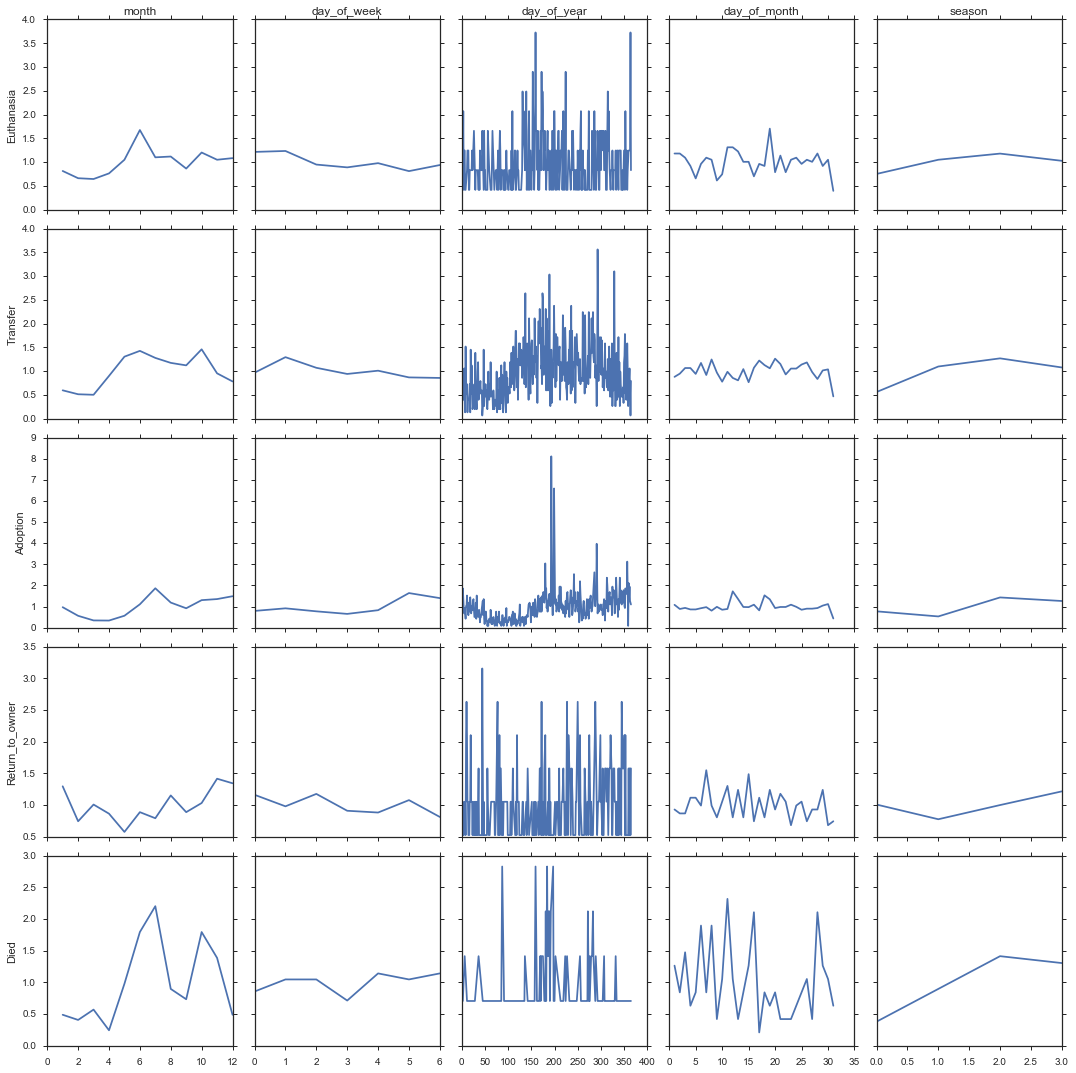

In [57]:
times = ['month','day_of_week','day_of_year','day_of_month','season']
outcomes = catdf['OutcomeType'].unique()
outmap = dict(zip(outcomes,range(outcomes.shape[0])))
fig,ax = plt.subplots(outcomes.shape[0],len(times),sharey="row",sharex="col")
for outcome,df in catdf.groupby('OutcomeType'):
    ax[outmap[outcome],0].set_ylabel(outcome)
    for tidx,time in enumerate(times):
        pltdf = (df[time].value_counts()).dropna().sortlevel().reset_index()
        norm = pltdf[time].sum()/pltdf[time].shape[0]
        ax[outmap[outcome],tidx].plot(pltdf['index'].values,pltdf[time].values/norm,label=outcome)
        ax[0,tidx].set_title(time)
fig.set_size_inches(15,15)
#for a in ax[:,-1]: a[-1].legend(loc='best')
fig.savefig("times.pdf")
fig.tight_layout()